Found 2356 images belonging to 7 classes.
Found 1320 images belonging to 7 classes.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 16, 16, 4)    592         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 16, 16, 4)    16          conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 16, 16, 4)    0           batch_normalization_18[0][0]     
_________________________

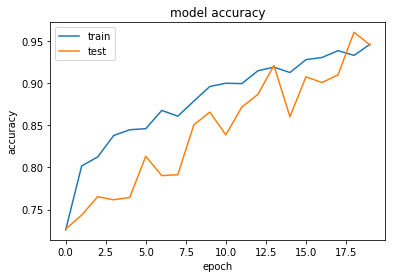

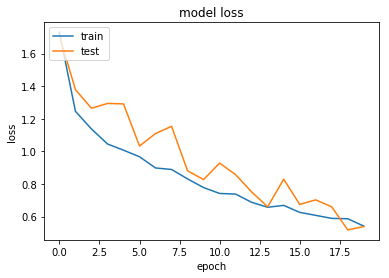

In [2]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import resnet


lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)


batch_size = 32
nb_classes = 7
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path=r'/home/abdul/Desktop/train'
test_path=r'/home/abdul/Desktop/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,target_size=(32,32),classes=['1','2','3','4','5','6','7'],batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,target_size=(32,32),classes=['1','2','3','4','5','6','7'],batch_size=62)


model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=38,validation_data=test_data,validation_steps=30,epochs=20,verbose=1)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(7, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

/home/abdul/anaconda2/envs/envds/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


Epoch 1/20
38/38 [==============================] - 88s 2s/step - loss: 2.3128 - acc: 0.3557 - val_loss: 2.2891 - val_acc: 0.7466
Epoch 2/20
38/38 [==============================] - 72s 2s/step - loss: 2.2507 - acc: 0.7738 - val_loss: 2.2294 - val_acc: 0.7070
Epoch 3/20
38/38 [==============================] - 70s 2s/step - loss: 2.1831 - acc: 0.7967 - val_loss: 2.1702 - val_acc: 0.7104
Epoch 4/20
38/38 [==============================] - 72s 2s/step - loss: 2.1207 - acc: 0.7882 - val_loss: 2.1121 - val_acc: 0.7122
Epoch 5/20
38/38 [==============================] - 70s 2s/step - loss: 2.0570 - acc: 0.7937 - val_loss: 2.0556 - val_acc: 0.7098
Epoch 6/20
38/38 [==============================] - 70s 2s/step - loss: 1.9889 - acc: 0.8022 - val_loss: 1.9971 - val_acc: 0.7156
Epoch 7/20
38/38 [==============================] - 71s 2s/step - loss: 1.9321 - acc: 0.7907 - val_loss: 1.9416 - val_acc: 0.7137
Epoch 8/20
38/38 [==============================] - 69s 2s/step - loss: 1.8714 - acc: 0.79

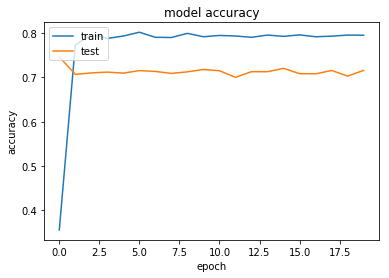

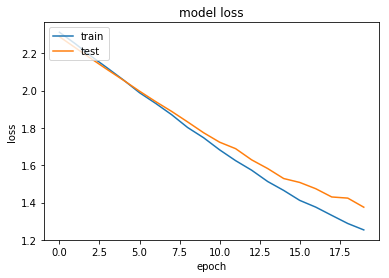

In [15]:
history=model_final.fit_generator(train_data,steps_per_epoch=38,validation_data=test_data,validation_steps=30,epochs=20,verbose=1)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
First i trained using resnet and than freezed the first 5 layer and added two dense layer of size 1024.